In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
plt.style.use('ggplot')

### 1. Beauty Pageants

=> The given data for the Miss World was collected manually from various sources like the official Miss World's site, Wikipedia and other news sites.

In [3]:
average_vs_cutoff = {
    'Nepal': [151, 160],
    'India': [154, 160],
    'Bangladesh' : [150,165],
    'Sri Lanka' : [154, 162],
    'Philippines' : [154, 162],
    'Malasiya' : [157, 165]
}

In [4]:
countries1 = list(average_vs_cutoff.keys())
heights = list(average_vs_cutoff.values())
average_heights = [i[0] for i in heights]
cutoff_heights = [i[1] for i in heights]
cutoff_heights

[160, 160, 165, 162, 162, 165]

In [5]:
# the winners avg is calculated from the avg of the past 0 winners
population_avg_vs_winners_avg = {
    'The USA' : [163,169],
    'Nepal' : [151, 169],
    'India' : [154, 173],
    'The Philippines' : [154, 173]
}

In [6]:
countries2 = list(population_avg_vs_winners_avg.keys())
heights2 = list(population_avg_vs_winners_avg.values())
avg_population_heights = [i[0] for i in heights2]
winners_avg_heights = [i[1] for i in heights2]
avg_population_heights, winners_avg_heights

([163, 151, 154, 154], [169, 169, 173, 173])

In [7]:
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}
def hor_bars(ax,labels,data1,data2,label1,label2,title):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax.bar(x - width/2,data1, width, label=label1,color = '#32628d', edgecolor='black')
    rects2 = ax.bar(x + width/2, data2, width, label=label2, color = '#cde01d', edgecolor='black')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    fontdict = {'fontsize':18,}
    ax.set_xlabel('Countries',labelpad=20, fontdict=fontdict )
    ax.set_ylabel('Heights (in cm)',labelpad=20, fontdict=fontdict)
    ax.set_title(title,fontdict=title_fontdict, pad=20)
    ax.set_xticks(x, labels,weight = 'bold')
    ax.tick_params(axis='y', which='major', labelsize=12)
    # ax.legend(loc='upper left')
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

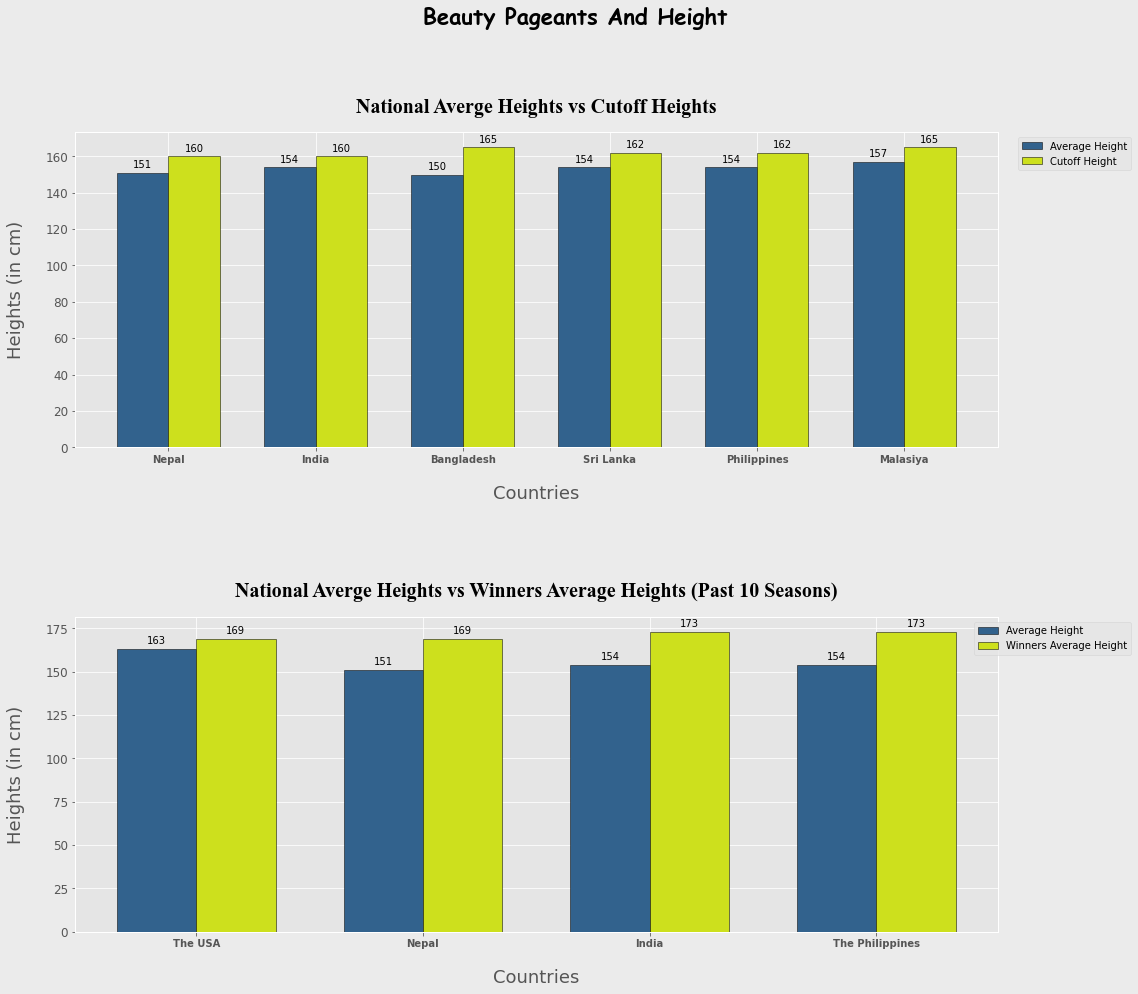

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(18,16),facecolor=(.92, .92, .92))

hor_bars(ax1,countries1,average_heights,cutoff_heights,"Average Height","Cutoff Height", "National Averge Heights vs Cutoff Heights")
hor_bars(ax2,countries2,avg_population_heights,winners_avg_heights,
         "Average Height","Winners Average Height", "National Averge Heights vs Winners Average Heights (Past 10 Seasons)")
fig.suptitle('Beauty Pageants And Height',fontweight = "bold",fontsize=22, fontname="Cursive",y=0.92)
fig.tight_layout(pad=8.0)

plt.show()

### 2. NBA Heights

NBA height distribution :- https://www.thehoopsgeek.com/average-nba-height/

In [52]:
df1 = pd.read_csv('dataset/NBA/Average-all-seasons.csv', encoding='utf-16')
df1.head()

,Year,All,PG,SG,SF,PF,C
0,2021/22,"6'6.2""","6'2.5""","6'4.5""","6'6.4""","6'8.2""","6'10.3"""
1,2020/21,"6'6.2""","6'2.6""","6'4.4""","6'6.7""","6'8""","6'10.5"""
2,2019/20,"6'6.3""","6'2.5""","6'4.4""","6'6.3""","6'8.2""","6'10.7"""
3,2018/19,"6'6.4""","6'2.5""","6'4.7""","6'7.1""","6'8.6""","6'10.6"""
4,2017/18,"6'6.4""","6'2.4""","6'4.6""","6'6.9""","6'8.7""","6'10.6"""


#### For easy visualisation, we will only consider the average heights of this century.

In [53]:
df1 = df1[:22]
df1.tail(2)

,Year,All,PG,SG,SF,PF,C
20,2001/02,"6'6.7""","6'1.8""","6'5.1""","6'7.6""","6'9""","6'11.4"""
21,2000/01,"6'6.6""","6'1.8""","6'4.9""","6'7.4""","6'9""","6'11.2"""


Converting the height into centimeter.

In [56]:
def convert_height_to_cm(height):
    feet, inches = height.split("'")  # Split height into feet and inches
    inches_decimal = float(inches.strip(' "'))  # Extract decimal inches and convert to float
    total_inches = float(feet) * 12 + inches_decimal  # Convert feet and inches to total inches
    height_cm = total_inches * 2.54  # Convert total inches to centimeters
    return round(height_cm, 2)


In [59]:
df1['Height_cm'] = df1['All'].apply(convert_height_to_cm)
df1.head(4)

,Year,All,PG,SG,SF,PF,C,Height_cm
0,2021/22,"6'6.2""","6'2.5""","6'4.5""","6'6.4""","6'8.2""","6'10.3""",198.63
1,2020/21,"6'6.2""","6'2.6""","6'4.4""","6'6.7""","6'8""","6'10.5""",198.63
2,2019/20,"6'6.3""","6'2.5""","6'4.4""","6'6.3""","6'8.2""","6'10.7""",198.88
3,2018/19,"6'6.4""","6'2.5""","6'4.7""","6'7.1""","6'8.6""","6'10.6""",199.14


In [63]:
average_male_height_US = [177]* len(df1)

In [96]:
df2 = pd.read_csv('dataset/NBA/heights-22-23.csv', encoding='utf-16')
df2.head(3)

,PLAYER,TEAM,AGE,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT YEAR,DRAFT ROUND,DRAFT NUMBER,GP,PTS,REB,AST,NETRTG,OREB%,DREB%,USG%,TS%,AST%
0,A.J. Lawson,DAL,22,6-6,179,South Carolina,Canada,Undrafted,Undrafted,Undrafted,13,2.6,0.8,0.1,-10.9,2.8,15.1,18.2,62.2,2.9
1,AJ Green,MIL,23,6-5,190,Northern Iowa,USA,Undrafted,Undrafted,Undrafted,33,4.5,1.2,0.6,-5.5,1.5,9.7,16.0,62.8,9.3
2,AJ Griffin,ATL,19,6-6,220,Duke,USA,2022,1,16,69,8.7,2.1,1.0,1.5,2.6,8.1,17.4,57.7,7.0


In [110]:
def convert_height_to_cm_new(height):
    feet, inches = height.split('-')  # Split height into feet and inches
    total_inches = int(feet) * 12 + int(inches)  # Convert feet and inches to total inches
    height_cm = total_inches * 2.54  # Convert total inches to centimeters
    return round(height_cm, 2)  # Round height in centimeters to two decimal places

# def convert_height_to_cm_new(height):
#     return float(height.replace('-','.'))

df2['HEIGHT_CM'] = df2['HEIGHT'].apply(convert_height_to_cm_new)
df2.head(2)

,PLAYER,TEAM,AGE,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT YEAR,DRAFT ROUND,DRAFT NUMBER,...,REB,AST,NETRTG,OREB%,DREB%,USG%,TS%,AST%,HEIGHT_CM,HEIGHT_NEW
0,A.J. Lawson,DAL,22,6-6,179,South Carolina,Canada,Undrafted,Undrafted,Undrafted,...,0.8,0.1,-10.9,2.8,15.1,18.2,62.2,2.9,198.12,6.6
1,AJ Green,MIL,23,6-5,190,Northern Iowa,USA,Undrafted,Undrafted,Undrafted,...,1.2,0.6,-5.5,1.5,9.7,16.0,62.8,9.3,195.58,6.5


In [151]:
fontdict = {'fontsize':16, 'fontweight':'bold'}
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}

def line_plot(ax, x, y1,y2, y1_label,y2_label, x_label, y_label, title, yticks=None):
    ax.plot(x,y1,marker='o',color='#32628d', label=y1_label)
    # ax.plot(x,y2,marker='o',color='r', label=y2_label)

    ax.set_xlabel(x_label,fontdict=fontdict,labelpad=20)
    ax.set_ylabel(y_label,fontdict=fontdict,labelpad=20)

    if yticks:
        ax.set_yticks(yticks)
        
    ax.set_xticks(np.arange(len(x)),x,weight = 'bold',rotation=60)
    ax.tick_params(axis='y', which='major', labelsize=12)
    ax.set_title(title, pad=15, fontdict=title_fontdict,loc="left")

    ax.legend()

In [152]:

def histogram_plot(ax, heights):

    ax.hist(heights,bins=16, edgecolor='black', color='#32628d')  
    ax.set_xlabel('Height (cm)',fontdict=fontdict,labelpad=20)
    ax.set_ylabel('Frequency',fontdict=fontdict,labelpad=20)
    # ax.set_xticks(len(heights),heights,weight = 'bold')

    ax.set_title('2. Height Distribution (Season 22/23)', pad=15, fontdict=title_fontdict,loc="left")

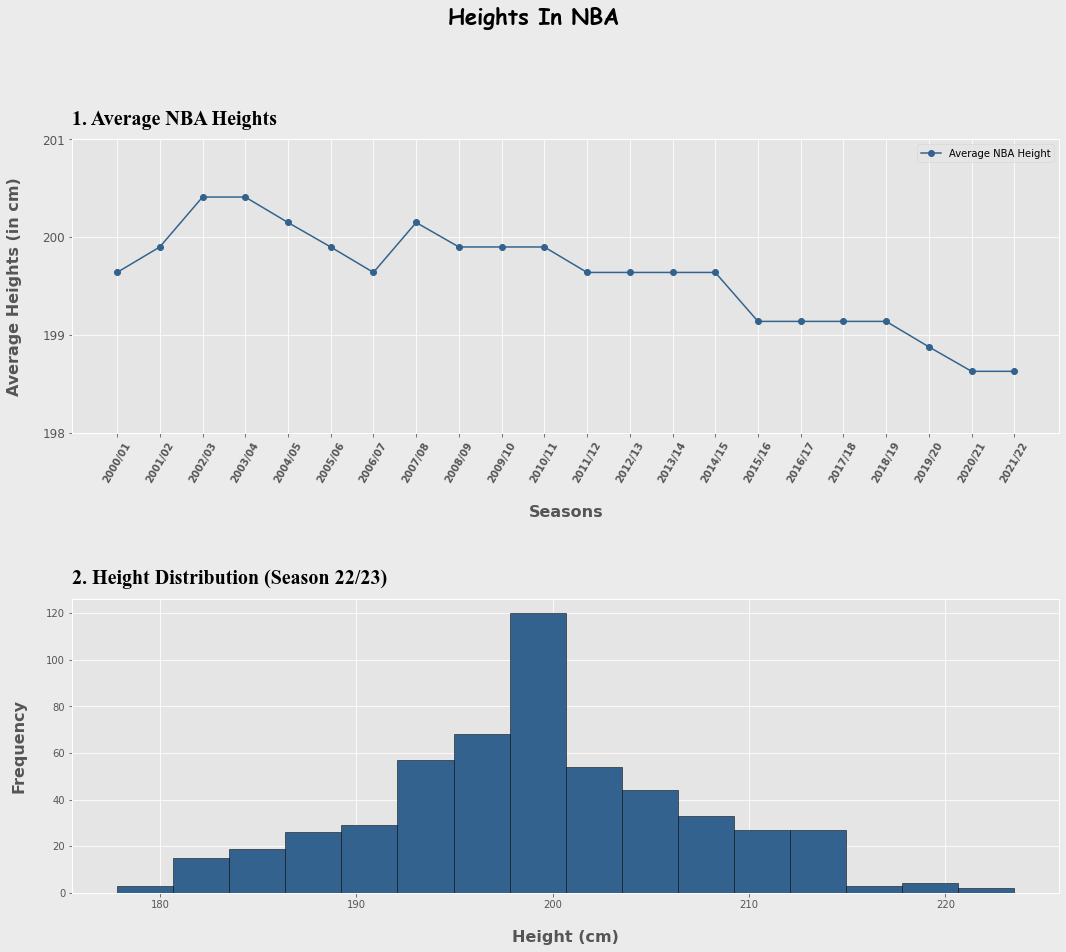

In [153]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(16,14),facecolor=(.92, .92, .92))
fontdict = {'fontsize':16, 'fontweight':'bold'}
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}

# ax1
yticks_1 = [i for i in range(198,202,1)] 
line_plot(ax1,df1['Year'][::-1],df1['Height_cm'][::-1],average_male_height_US,
          "Average NBA Height","Average US Male Heights","Seasons","Average Heights (in cm)","1. Average NBA Heights ",yticks_1)

histogram_plot(ax2,df2['HEIGHT_CM'])
fig.suptitle('Heights In NBA',fontweight = "bold",fontname="Cursive",fontsize=22,)
fig.tight_layout(pad=5.0)
plt.show()